# Linear Regression with Python

Our goal with linear regression is to minimize the vertical distance between all the data points and our line.
So in determining the best line, we are attempting to minimize the distance between all the points and their distance to our line.
<br>We’ll use the <b>Least Squares Method</b>, which is fitted by <b>minimizing the sum of squares of the residuals</b>.
The residuals for observation are the difference between the observation (the y-value) and the fitted line.
<br><b>We’ll use SciKit-Learn and Python to create a linear regression model.</b>

![Alt text](LinearReg.jpg)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data

In [2]:
customer = pd.read_csv("D:\\P Y T H O N\\Machine Learning\\Ecommerce Customers.txt")
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### EDA : Exploratory Data Analysis

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
sns.set_palette('viridis')    # magma, crest, rocket_r, flare, mako, rocket, viridis
sns.set_style('whitegrid')

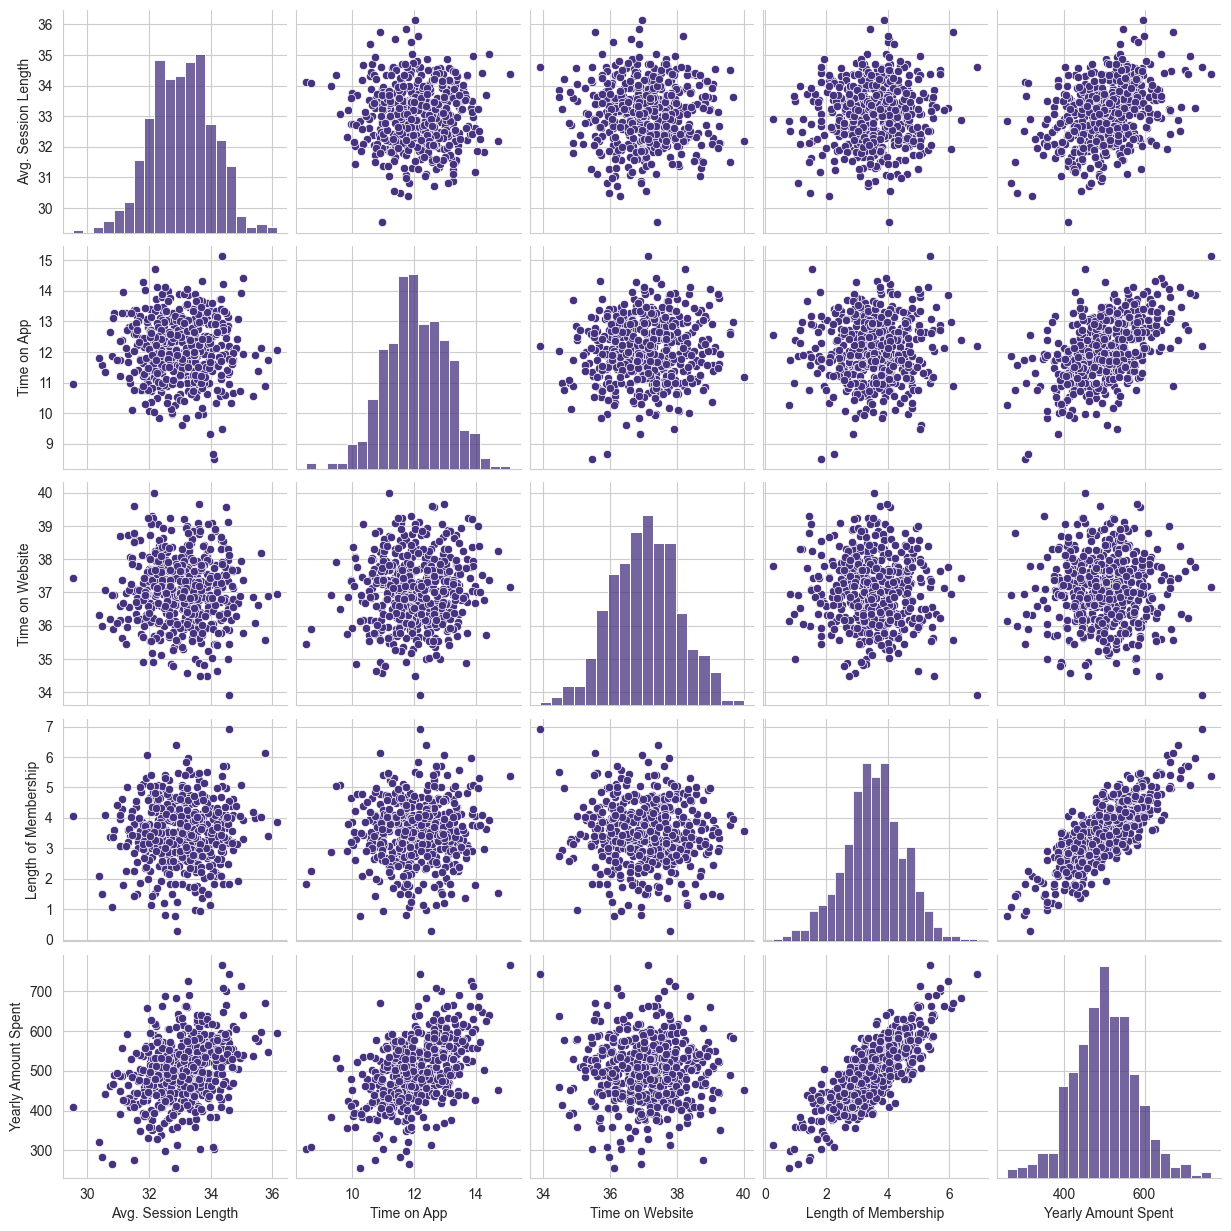

In [6]:
sns.pairplot(customer)

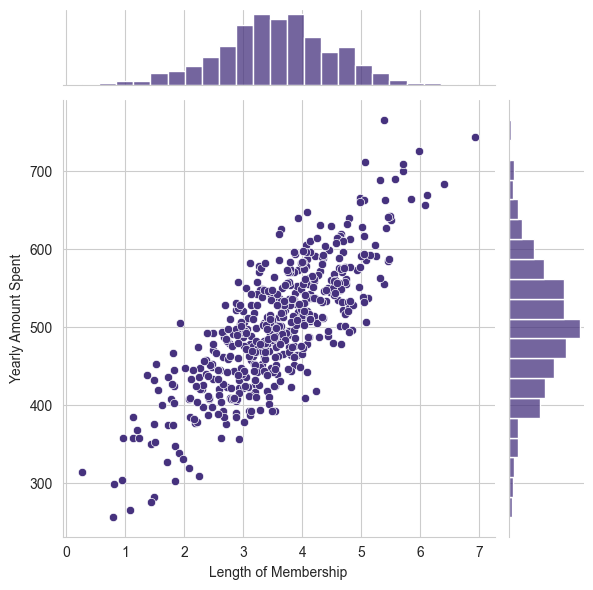

In [7]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customer)

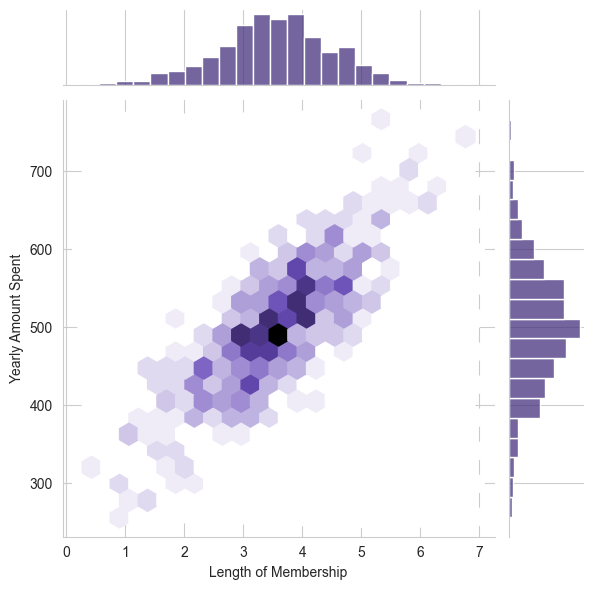

In [8]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customer, kind='hex')

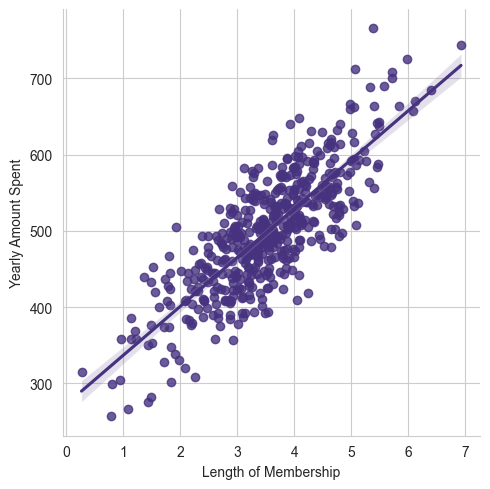

In [9]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customer)

### Training and Testing Data

In [10]:
X = customer[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customer['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Predicting Test Data

In [15]:
predictions = lm.predict(X_test)

### Evaluating the Model

Text(0, 0.5, 'Y predictions')

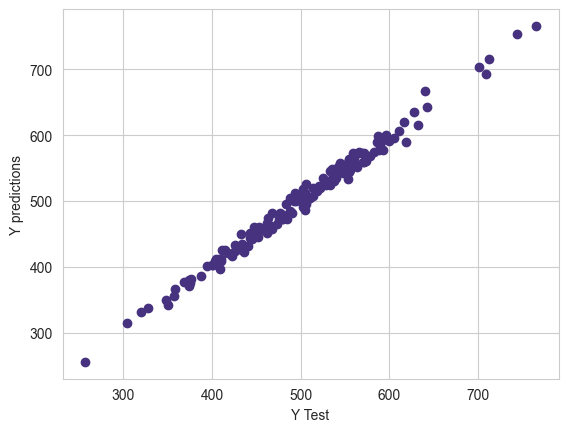

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Y predictions')

#### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [22]:
from sklearn import metrics

print('Avg. Yearly Amount Spent is: ', customer['Yearly Amount Spent'].mean())
print('MAE : ' , metrics.mean_absolute_error(y_test,predictions))
print('MSE : ' , metrics.mean_squared_error(y_test,predictions))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Avg. Yearly Amount Spent is:  499.31403825859053
MAE :  7.228148653430811
MSE :  79.81305165097385
RMSE :  8.9338150669786


##### Average of Yearly Amount Spent is $500, and Mean Absolute Error (MAE) of less than $10, means an error of less than 2%, which is great.

### Conclusion

In [25]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of \$25.98 **.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of \$38.58 **.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of \$0.19 **.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of \$61.28 **.